# Regresión Ridge

En este notebook se encuentra la implementación del algoritmo de Regresion Ridge con el objetivo de estimar el precio de vehículos usados a partir de ciertas características.

### Primero importamos las librerias necesarias

In [1]:
import pandas as pd
from sklearn.linear_model import Ridge
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
import matplotlib.pyplot as plt

### Luego procedemos a leer los datos de train y test

In [2]:
# Leer los datos

# Train data
X_train = pd.read_excel("X_train.xlsx")
X_train = X_train.iloc[:,1:]

y_train = pd.read_excel("y_train.xlsx")
y_train = y_train.iloc[:,1:]

# Test data
X_test = pd.read_excel("X_test.xlsx")
X_test = X_test.iloc[:,1:]

y_test = pd.read_excel("y_test.xlsx")
y_test = y_test.iloc[:,1:]

Ahora, realizaremos una experimentación haciendo la regresión ridge para distintos valores de alpha para asi encontrar el alpha que hace que el error sea minimo.

Lo que se realizó fue comenzar con un $\alpha=0$ e ir aumentandolo en 0.01 hasta llegar a 100. Luego se graficó el MAPE obtenido con cada $\alpha$ para poder visualizar con cual de estos se obtuvo un menor error.

In [3]:
# Inicialización
mape = []
rmse = []
r2 = []
alpha_list = []
alpha_exp = 0

# Experimentación
while alpha_exp <= 100:
    alpha_list.append(alpha_exp)
    
    ridge_model = Ridge(alpha = alpha_exp)
    ridge_model.fit(X_train, y_train)
    y_pred = ridge_model.predict(X_train)
    
    mape_val = mean_absolute_percentage_error(y_train, y_pred)*100
    rmse_val = np.sqrt(mean_squared_error(y_train, y_pred))
    r2_val = r2_score(y_train, y_pred)
    
    mape.append(mape_val)
    rmse.append(rmse_val)
    r2.append(r2_val)
    
    alpha_exp += 0.01

Text(0, 0.5, 'MAPE (%)')

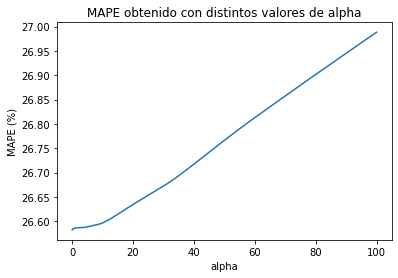

In [4]:
# Grafica de el error MAPE obtenido con cada alpha
plt.plot(alpha_list, mape)
plt.title('MAPE obtenido con distintos valores de alpha')
plt.xlabel('alpha')
plt.ylabel('MAPE (%)')

In [5]:
# Obtención del mejor alpha y las metricas obtenidas con dicho alpha
ind = mape.index(min(mape))
mejor_alpha = alpha_list[ind]
mejor_mape = mape[ind]
mejor_rmse = rmse[ind]
mejor_r2 = r2[ind]
print('Alpha:',mejor_alpha)
print('RMSE:',mejor_rmse)
print('R^2:',mejor_r2)
print('MAPE:',mejor_mape,'%')

Alpha: 0
RMSE: 20640957.473055005
R^2: 0.6988630251792038
MAPE: 26.582066982746856 %


Ahora, con el $\alpha$ hallado anteriormente, pocedemos a hacer la regresión ridge pero con los datos test para verificar como funciona el algoritmo con datos que aun no conoce.

In [6]:
# Con el mejor alpha = 0
ridge_model = Ridge(alpha = 0)
ridge_model.fit(X_test, y_test)
y_pred = ridge_model.predict(X_test)

In [7]:
print('RMSE:',np.sqrt(mean_squared_error(y_test, y_pred)))
print('R^2:',r2_score(y_test, y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred)*100,'%')

RMSE: 20494799.078195807
R^2: 0.6947843348644974
MAPE: 27.29125527805214 %
